In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

In [3]:
num_sim = 10
num_sim1 = 9

In [4]:
# Configurar Matplotlib para usar STIX y un tamaño de fuente más grande
matplotlib.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "font.size": 14,  # Cambia este valor para ajustar el tamaño de fuente global
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

In [5]:
#Paso los archivos con los pesos a matrices

def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

#quiero usar los mismos colores para los distintos valores de pqif

colores = ['r', 'g', 'b']

In [6]:
def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros

Abrimos los resultados y extraigamos los datos del archivo `parámetros`

In [7]:
nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
data = pd.read_csv(nombre_archivo)


filename_parametros = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
parametros = cargar_archivo_parametros(filename_parametros)


# Ahora puedes acceder a los parámetros como lo harías normalmente
N = parametros['N']
nloop = parametros['nloop']
nloop_train = parametros['nloop_train']
cant_seed = parametros['cant_seed']
print(cant_seed)
gsyn = parametros['gsyn']


# Obtener los valores únicos de 'pqif'
pqif_values = data['pqif'].unique()

nombre_archivo1 = f'simulacion_{num_sim1}/simulacion_{num_sim1}_resultados.csv'
data1 = pd.read_csv(nombre_archivo1)


# Obtener los valores únicos de 'pqif'
pqif_values1 = data1['pqif'].unique()



nombre_archivo2 = f'/home/martina/prueba/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
data2 = pd.read_csv(nombre_archivo2)


# Obtener los valores únicos de 'pqif'
pqif_values2 = data2['pqif'].unique()




10


Primero veamos como resultó el aprendizaje

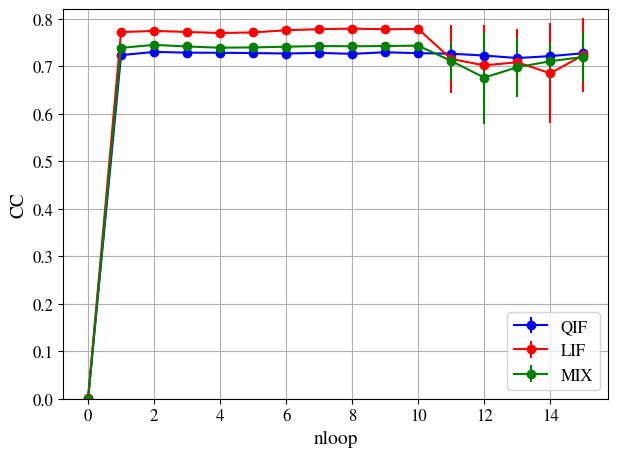

In [8]:
# Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
for i in range(len(pqif_values)):

    pqif_value = pqif_values[i]
    
    color = colores[i]
    # Filtrar los datos para el valor actual de 'pqif'
    data_pqif = data[(data['pqif'] == pqif_value) ]

    # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
    grouped_data = data_pqif.groupby(['nloop'])
    grouped_data1 = data1.groupby(['nloop'])
    grouped_data2 = data2.groupby(['nloop'])

    for columna in ['cc']:
        grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()
        grouped_column_data1 = grouped_data1[columna].agg(['mean', 'std']).reset_index()
        grouped_column_data2 = grouped_data2[columna].agg(['mean', 'std']).reset_index()
        # Graficar cc vs nloop para cada 'pqif' con barras de error
        plt.errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'QIF', color = 'b', fmt='-o')
        plt.errorbar(grouped_column_data1['nloop'], grouped_column_data1['mean'], yerr=grouped_column_data1['std'], label=f'LIF', color = 'r', fmt='-o')            
        plt.errorbar(grouped_column_data2['nloop'], grouped_column_data2['mean'], yerr=grouped_column_data2['std'], label=f'MIX', color = 'g', fmt='-o')            

        # Agregar leyenda al subplot actual
        



    plt.xlabel('nloop')
    plt.ylabel('CC')
    plt.ylim(0, 0.82)

## Asquerosidad para agregar caso 0.5





plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

Miremos las distribuciones de los motifs pre y post training

-0.0057743989582944 -0.0057743989582944 -0.0057743989582944 0.0029128585065894 0.0040989894634861 0.0029128585065894
-0.0002635419427289 -0.0002635419427289 -0.0002635419427289 0.0002331292373955 0.0002331292373955 0.0002331292373955
-0.002004008016032 -0.002004008016032 -0.002004008016032 -0.002004008016032 -0.002004008016032 -0.002004008016032
-1.1674783593545037e-05 -1.6428815484914533e-05 -1.1674783593545064e-05 2.3143883600378715e-05 2.3143883600378715e-05 2.314388360037867e-05


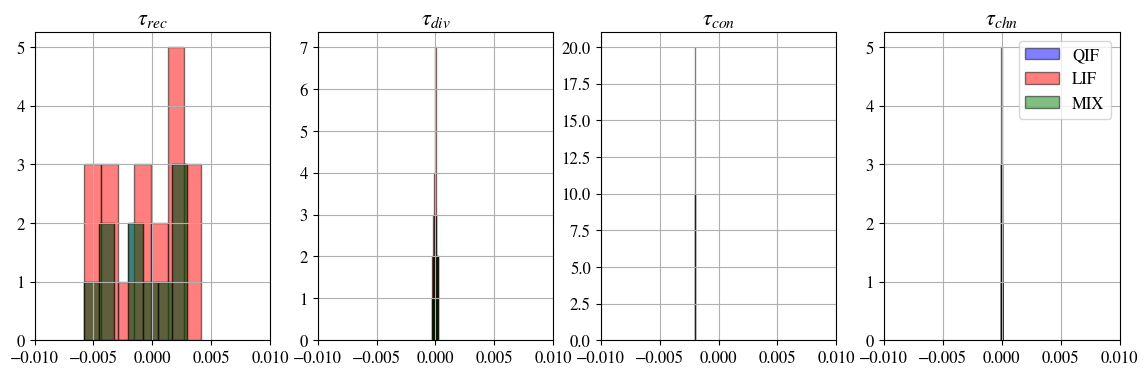

0.5937197127877347 0.0995987089074447 0.1873536580355008 0.6247333917965309 0.1792501771080919 0.2519959565271734
-0.0015426719253394 -0.0010530644849932 0.0005063108813249 -0.0015123759045212 -0.0002470168468642 0.0020909357851299
-0.0019809093358965 -0.0017191086501768 -0.0014911418990085 -0.0018552955907955 0.0005078617637474 0.0012667276034363
-0.0026228893742577 -0.0009041682464087 -0.0034369079814154 -0.0023235763998744 0.0002268365136472 -0.0008930725682235


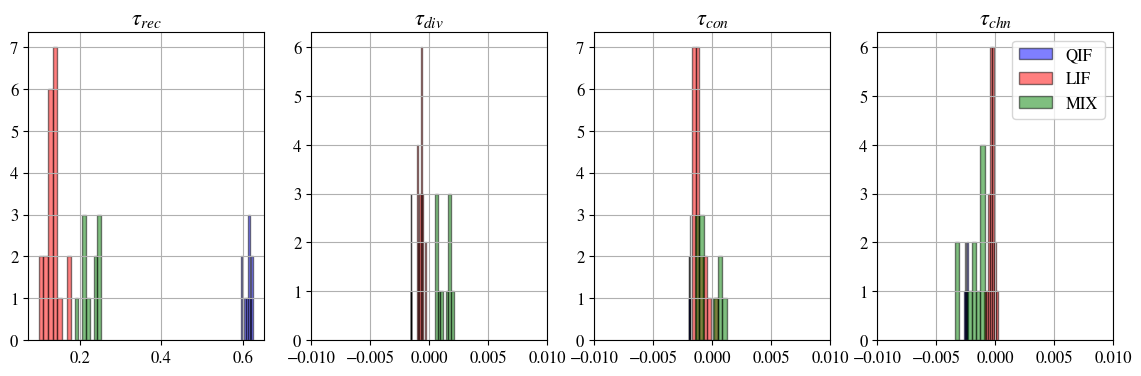

In [9]:
# Crear histogramas para cada columna de tau con nloop = 0
columns_tau = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
columns_tau_latex = [r'$\tau_{rec}$', r'$\tau_{div}$', r'$\tau_{con}$', r'$\tau_{chn}$']


for loop in [0, nloop-1]:
    fig = plt.figure(figsize=(14, 4))

    df_filtered = data[(data['nloop'] == loop)]
    df_filtered1 = data1[(data1['nloop'] == loop)]
    df_filtered2 = data2[(data2['nloop'] == loop)]

    for idx, column in enumerate(columns_tau):
        plt.subplot(1, 4, idx + 1)
        min_val = np.min(df_filtered[column])
        max_val = np.max(df_filtered[column])
        
        min_val1 = np.min(df_filtered1[column])
        max_val1 = np.max(df_filtered1[column])
        
        min_val2 = np.min(df_filtered2[column])
        max_val2 = np.max(df_filtered2[column])
        print(min_val, min_val1, min_val2, max_val, max_val1, max_val2)

        for i in range(len(pqif_values)):
            pqif_value = pqif_values[i]
            pqif_value1 = pqif_values1[i]
            pqif_value2 = pqif_values2[i]

            df_pqif = df_filtered[df_filtered['pqif'] == pqif_value]
            df_pqif1 = df_filtered1[df_filtered1['pqif'] == pqif_value1]
            df_pqif2 = df_filtered2[df_filtered2['pqif'] == pqif_value2]
            
            bins = np.linspace(min_val, max_val, 8)
            bins1 = np.linspace(min_val1, max_val1, 8)
            bins2 = np.linspace(min_val2, max_val2, 8)
            
            mean = np.mean(df_pqif[column])
            mean_formatted = f'{mean:.4f}'
            mean1 = np.mean(df_pqif1[column])
            mean_formatted1 = f'{mean1:.4f}'
            mean2 = np.mean(df_pqif2[column])
            mean_formatted2 = f'{mean2:.4f}'


            
            plt.hist(df_pqif[column], bins, edgecolor='black', color='b', label= 'QIF', alpha=0.5)
            plt.hist(df_pqif1[column], bins1, edgecolor='black', color='r', label= 'LIF', alpha=0.5)
            plt.hist(df_pqif2[column], bins2, edgecolor='black', color='g', label= 'MIX',  alpha=0.5)
            
            plt.title(columns_tau_latex[idx])
            plt.grid()
         
            if loop == 0 or (loop != 0 and idx != 0):
                plt.xlim(-0.01, 0.01)
    plt.legend()
    plt.show()



Cambiemos el formato de los valores de pqif para que sean compatibles con los nombres de los archivos

In [10]:
def first_significant_digit(value):
    """
    Devuelve la primera cifra significativa de un valor dado.
    """
    # Convertir el valor a una cadena para poder manipularlo
    str_value = f'{value:.10f}'  # Limitar la precisión para evitar problemas de punto flotante
    
    if '.' in str_value:
        str_value = str_value.rstrip('0').rstrip('.')  # Eliminar ceros innecesarios al final del número
    
    return str_value  # Devuelve el valor completo sin ceros innecesarios



# Obtener los valores únicos de 'pqif'
pqif_values = data['pqif'].unique()

Analizemos `tau_rec`

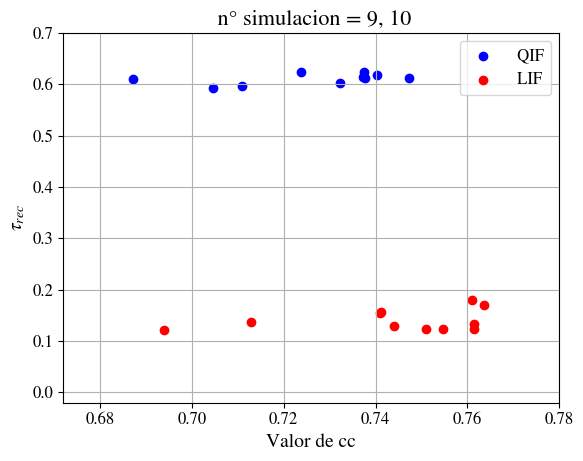

In [11]:
data_nloop_11 = data[data['nloop'] == 11]
data_nloop_111 = data1[data1['nloop'] == 11]

# Iterar sobre cada valor único de 'pqif'
for i, pqif_value in enumerate(pqif_values):
    # Filtrar los datos para este valor de 'pqif'
    data_pqif = data_nloop_11[data_nloop_11['pqif'] == pqif_value]

    # Obtener los valores de tau_rec y cc para este valor de 'pqif'
    tau_rec_values = data_pqif['tau_rec']
    cc_values = data_pqif['cc']

    if pqif_value == 0:
        label = 'LIF'
    elif pqif_value == 0.5:
        label = 'MIX'
    elif pqif_value == 1:
        label = 'QIF'

    
    pqif_value1 = pqif_values1[i]
    # Obtener los valores de tau_rec y cc para este valor de 'pqif'
    tau_rec_values1 = data_nloop_111 ['tau_rec']
    cc_values1= data_nloop_111 ['cc']

    if pqif_value1 == 0:
        label1 = 'LIF'
    elif pqif_value1 == 0.5:
        label1 = 'MIX'
    elif pqif_value1 == 1:
        label1 = 'QIF'


    # Graficar tau_rec vs cc para este valor de 'pqif'
    plt.scatter(cc_values, tau_rec_values, label=f' {label}', color='b')
    plt.scatter(cc_values1, tau_rec_values1, label=f' {label1}', color = 'r')
    plt.title(f' n° simulacion = {num_sim}')


    plt.xlabel('CC')
    plt.ylabel('Tau_rec')

    # Ajustar el diseño del subplot
    plt.grid(True)


    if i == 2:
        plt.legend()
        
plt.xlim(0.672, 0.78)
plt.ylim(-0.02, 0.7)

plt.title(f' n° simulacion = {num_sim1}, {num_sim}')


plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')

plt.legend()
plt.grid(True)
plt.show()



En los casos mixtos, separemos las interacciones QIF-QIF, QIF.LIF, LIF-QIF, LIF-LIF. Implementar cuando sea necesario

In [12]:
pqif_mix = pqif_mix = pqif_values[(pqif_values != 0) & (pqif_values != 1)]

tau_rec_cuadrante1 = []
tau_rec_cuadrante2 = []
tau_rec_cuadrante3 = []
tau_rec_cuadrante4 = []


cc_values = []

# Bucle sobre las semillas
for k in range(cant_seed):
    # Simular y calcular tau_rec para cada cuadrante
    matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
    rows, cols = matrix.shape
    mid_row, mid_col = rows // 2, cols // 2
    cuadrante1 = matrix[:mid_row, :mid_col]
    cuadrante2 = matrix[:mid_row, mid_col:]
    cuadrante3 = matrix[mid_row:, :mid_col]
    cuadrante4 = matrix[mid_row:, mid_col:]
    
    _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
    _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
    _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
    _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)
    
    # Guardar los valores de tau_rec y cc para cada cuadrante
    tau_rec_cuadrante1.append(tau_rec1)
    tau_rec_cuadrante2.append(tau_rec2)
    tau_rec_cuadrante3.append(tau_rec3)
    tau_rec_cuadrante4.append(tau_rec4)

    # Obtener los valores de cc para esta semilla desde el archivo de resultados
    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)
    data_select = data[(data['pqif'] == 0.5) & (data['nloop'] == 10) & (data['seed'] == k)]
    cc_values.append(data_select['cc'].values[0])

# Convertir las listas a arrays de numpy para facilitar el manejo de los datos
tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)
cc_values = np.array(cc_values)

# Graficar tau_rec para todos los cuadrantes en función de cc
plt.scatter(cc_values, tau_rec_cuadrante1, color='c', label='QIF-QIF')
plt.scatter(cc_values, tau_rec_cuadrante4, color='m', label='LIF-LIF')
plt.scatter(cc_values, tau_rec_cuadrante2, color='y', label='MIX')
plt.scatter(cc_values, tau_rec_cuadrante3, color='y')
plt.title(f' n° simulacion = {num_sim}')

plt.xlim(0.672, 0.78)
# Etiquetas y leyenda
plt.xlabel('Valor de cc')
plt.ylabel(r'$\tau_{rec}$')
plt.legend()
plt.grid(True)
plt.ylim(-0.02, 0.264)

NameError: name 'pqif' is not defined

Ahora visualizemos lo anterior en forma de histograma

In [ ]:
simulations = [0, 5, 8]
cant_seed = 6
pqif = 0.5

# Bucle sobre las simulaciones
for num_sim in simulations:
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Leer y procesar la matriz de pesos para cada semilla
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]

        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)

    # Graficar los histogramas de tau_rec para cada cuadrante en los mismos ejes
    plt.figure(figsize=(10, 6))
    plt.hist(tau_rec_cuadrante1, bins=4, color='c', alpha=0.7, label='QIF-QIF')
    plt.hist(tau_rec_cuadrante2, bins=4, color='y', alpha=0.7, label='MIX')
    plt.hist(tau_rec_cuadrante3, bins=4, color='orange', alpha=0.7, label='MIX')
    plt.hist(tau_rec_cuadrante4, bins=4, color='m', alpha=0.7, label='LIF-LIF')
    plt.xlim(-0.1, 0.2)
    plt.xlabel(r'$\tau_{rec}$')
    plt.ylabel('Frecuencia')
    plt.title(fr'Histogramas de $\tau_{{rec}}$ para cada cuadrante - Simulación n° {num_sim}')
    plt.legend()
    plt.grid(True)
    plt.show()

NameError: name 'motifs' is not defined

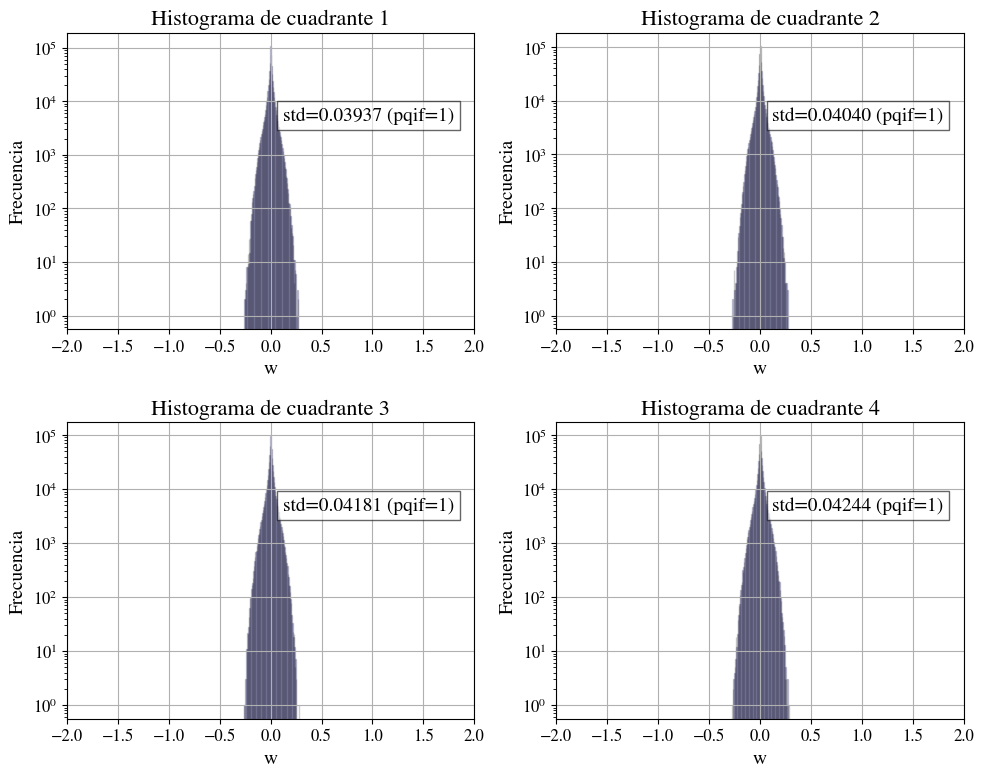

In [13]:
import numpy as np
import matplotlib.pyplot as plt

cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object)



# Colores para cada pqif
colors = {0: 'red', 0.5: 'green', 1: 'blue'}


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for pqif in pqif_values:
    for k in range(cant_seed):
        matrix = csv_to_matrix(f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif)}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2
        cuadrante1[k] = matrix[:mid_row, :mid_col]
        cuadrante2[k] = matrix[:mid_row, mid_col:]
        cuadrante3[k] = matrix[mid_row:, :mid_col]
        cuadrante4[k] = matrix[mid_row:, mid_col:]

    cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]

    for m, ax in enumerate(axes.flatten()):
        # Concatenar todas las matrices del cuadrante en una sola matriz
        cuadrante_combined = np.concatenate([mat.flatten() for mat in cuadrantes[m]])
        
        # Construir el histograma en el subplot correspondiente
        counts, bins = np.histogram(cuadrante_combined, bins=100)
        std = np.std(cuadrante_combined)
        text_x = 0.95
        text_y = 0.95 - 0.1 * list(colors.keys()).index(pqif)  # Adjust y position to avoid overlap
        
        # Graficar el histograma con color específico
        ax.hist(bins[:-1], bins, weights=counts, color=colors[pqif], edgecolor='black', alpha=0.2, label=f'pqif={pqif}')
        ax.text(text_x, text_y, f"std={std:.5f} (pqif={pqif})", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))

        ax.set_title(f'Histograma de cuadrante {m+1}')
        ax.set_xlabel('w')
        ax.set_ylabel('Frecuencia')
        ax.set_yscale("log")
        ax.set_xlim(-2, 2)
        ax.grid(True)

    plt.tight_layout()
    plt.show()


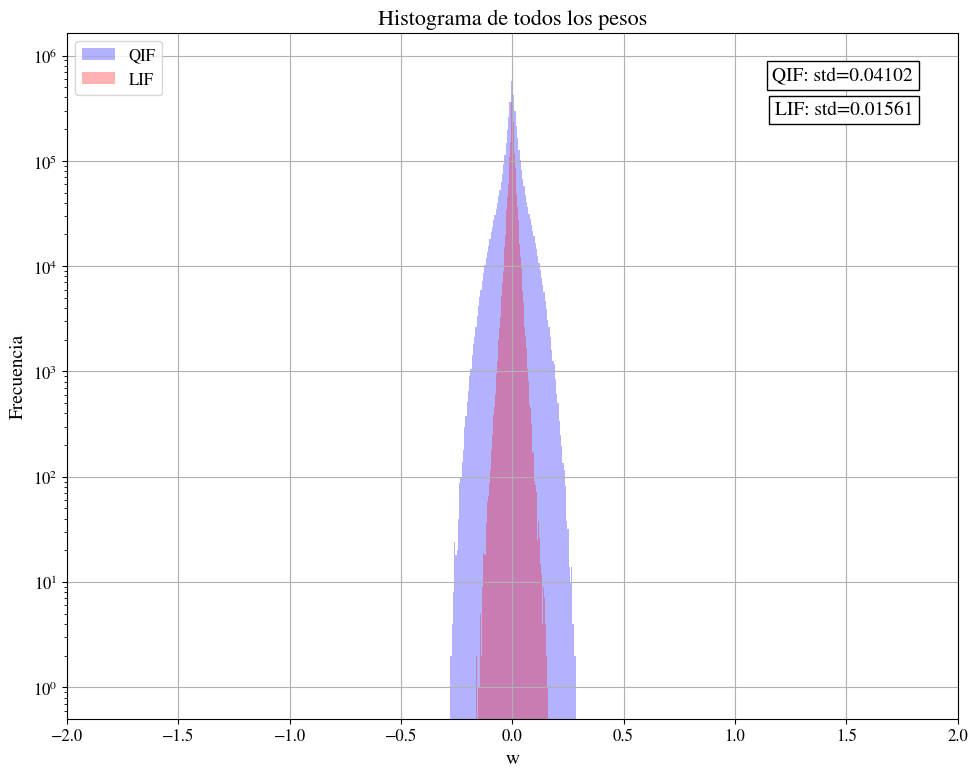

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
for pqif in pqif_values:
    # Inicializar una lista para almacenar todos los pesos.
    todos_los_pesos = []
    todos_los_pesos1 = []

    for k in range(cant_seed):
        # Leer la matriz desde el archivo CSV
        filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif)}_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)

        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos.extend(matrix.flatten())
        filename1 = f'simulacion_{num_sim1}/simulacion_{num_sim1}_matrices_pesos/simulacion_{num_sim1}_pesos_pqif_{first_significant_digit(pqif_value1)}_matriz_iloop_11_semilla_{k}'
        matrix1 = csv_to_matrix(filename1)

        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos.extend(matrix.flatten())
        todos_los_pesos1.extend(matrix1.flatten())
    # Convertir la lista de pesos en un array de NumPy
    todos_los_pesos = np.array(todos_los_pesos)
    todos_los_pesos1 = np.array(todos_los_pesos1)



    # Calcular el histograma
    counts, bins = np.histogram(todos_los_pesos, bins=100)
    counts1, bins1 = np.histogram(todos_los_pesos1, bins=100)

    # Calcular la desviación estándar
    std = np.std(todos_los_pesos)
    text_x = 0.95
    text_y = 0.95
    ax.text(text_x, text_y, f"QIF: std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    # Graficar el histograma
    ax.hist(bins[:-1], bins, weights=counts, alpha = 0.3, color = 'b',label = 'QIF')
    ax.hist(bins1[:-1], bins1, weights=counts1, alpha = 0.3, color = 'r',label =  'LIF')
    ax.set_title('Histograma de todos los pesos')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    # Calcular la desviación estándar
    std1 = np.std(todos_los_pesos1)

    text_y1 = 0.9
    ax.text(text_x, text_y1, f"LIF: std={std1:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    ax.grid(True)
    plt.legend(loc = 'upper left')
    plt.xlim(-2,2)

    plt.tight_layout()
    plt.show()

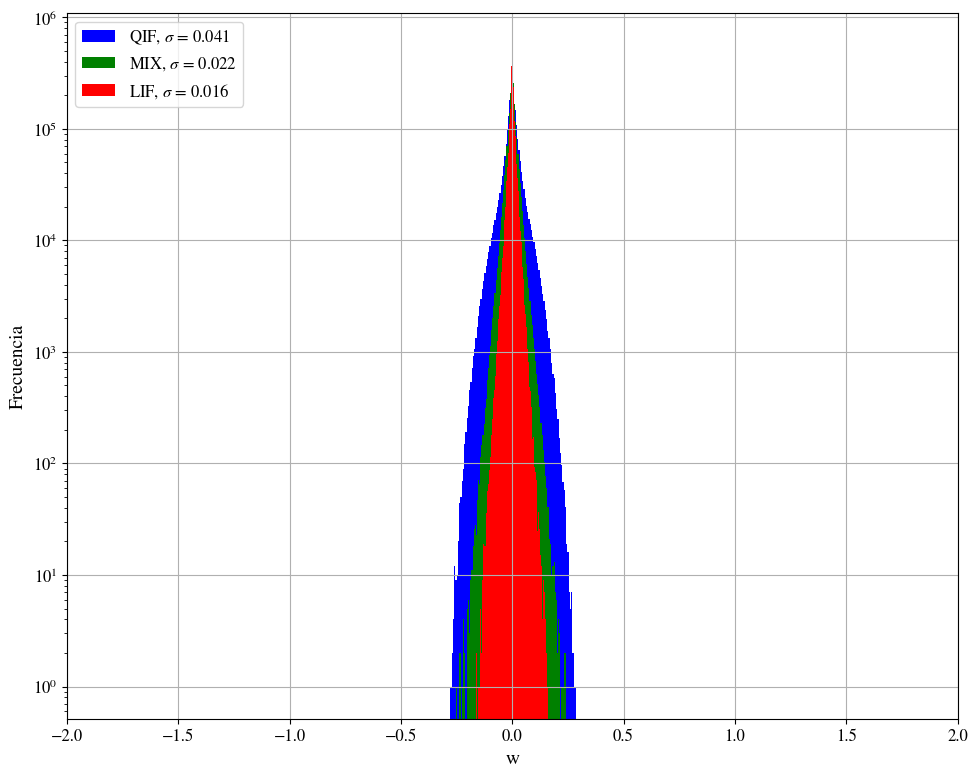

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

for pqif in pqif_values:
    # Inicializar una lista para almacenar todos los pesos.
    todos_los_pesos = []
    todos_los_pesos1 = []
    todos_los_pesos2 = []

    for k in range(cant_seed):
        # Leer la matriz desde el archivo CSV
        filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_1_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)
        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos.extend(matrix.flatten())

        filename1 = f'simulacion_{num_sim1}/simulacion_{num_sim1}_matrices_pesos/simulacion_{num_sim1}_pesos_pqif_0_matriz_iloop_11_semilla_{k}'
        matrix1 = csv_to_matrix(filename1)
        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos1.extend(matrix1.flatten())

        filename2 = f'/home/martina/prueba/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_0.5_matriz_iloop_11_semilla_{k}'
        matrix2 = csv_to_matrix(filename2)
        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos2.extend(matrix2.flatten())

    # Convertir la lista de pesos en un array de NumPy
    todos_los_pesos = np.array(todos_los_pesos)
    todos_los_pesos1 = np.array(todos_los_pesos1)
    todos_los_pesos2 = np.array(todos_los_pesos2)

    # Calcular el histograma
    counts, bins = np.histogram(todos_los_pesos, bins=100)
    counts1, bins1 = np.histogram(todos_los_pesos1, bins=100)
    counts2, bins2 = np.histogram(todos_los_pesos2, bins=100)

    # Calcular la desviación estándar
    std = np.std(todos_los_pesos)
    std1 = np.std(todos_los_pesos1)
    std2 = np.std(todos_los_pesos2)


    # Graficar el histograma
    ax.hist(bins[:-1], bins, weights=counts, color='b', label=fr'QIF, $\sigma$ = {np.std(todos_los_pesos):.3f}')

    ax.hist(bins2[:-1], bins2, weights=counts2, color='g', label=fr'MIX, $\sigma$ = {np.std(todos_los_pesos2):.3f}')
    ax.hist(bins1[:-1], bins1, weights=counts1,  color='r', label=fr'LIF, $\sigma$ = {np.std(todos_los_pesos1):.3f}')


    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.grid(True)
    plt.legend(loc='upper left')
    plt.xlim(-2, 2)
    plt.tight_layout()
    plt.show()


10


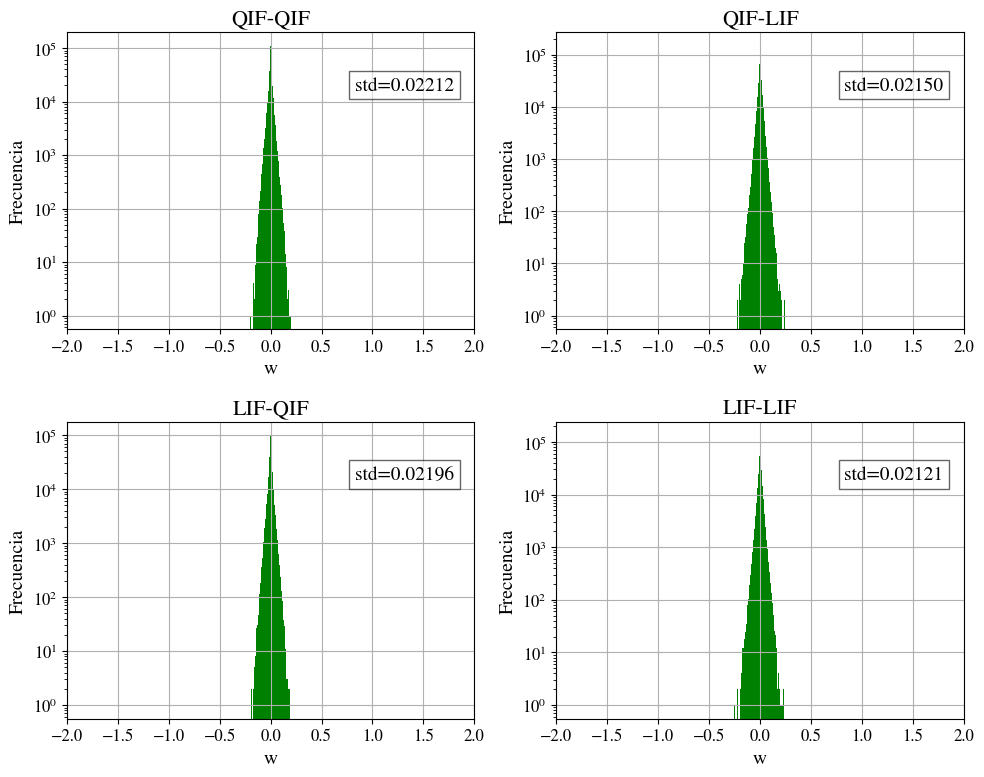

In [ ]:
cant_seed =10

cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object)
num_sim= 10

print(num_sim)

# Colores para cada pqif
colors = {0: 'red', 0.5: 'green', 1: 'blue'}


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pqif = 0.5

for k in range(cant_seed):
    matrix = csv_to_matrix(f'/home/martina/prueba/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_0.5_matriz_iloop_11_semilla_{k}')
    rows, cols = matrix.shape
    mid_row, mid_col = rows // 2, cols // 2
    cuadrante1[k] = matrix[:mid_row, :mid_col]
    cuadrante2[k] = matrix[:mid_row, mid_col:]
    cuadrante3[k] = matrix[mid_row:, :mid_col]
    cuadrante4[k] = matrix[mid_row:, mid_col:]

cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]

titulos = ['QIF-QIF', 'QIF-LIF', 'LIF-QIF', 'LIF-LIF']
for m, ax in enumerate(axes.flatten()):
    # Concatenar todas las matrices del cuadrante en una sola matriz
    cuadrante_combined = np.concatenate([mat.flatten() for mat in cuadrantes[m]])
    
    # Construir el histograma en el subplot correspondiente
    counts, bins = np.histogram(cuadrante_combined, bins=100)
    std = np.std(cuadrante_combined)
    text_x = 0.95
    text_y = 0.95 - 0.1 * list(colors.keys()).index(pqif)  # Adjust y position to avoid overlap
    
    # Graficar el histograma con color específico
    ax.hist(bins[:-1], bins, weights=counts, color=colors[pqif], label=f'pqif={pqif}')
    ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.6))

    ax.set_title(titulos[m])
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2, 2)
    ax.grid(True)

plt.tight_layout()
plt.show()

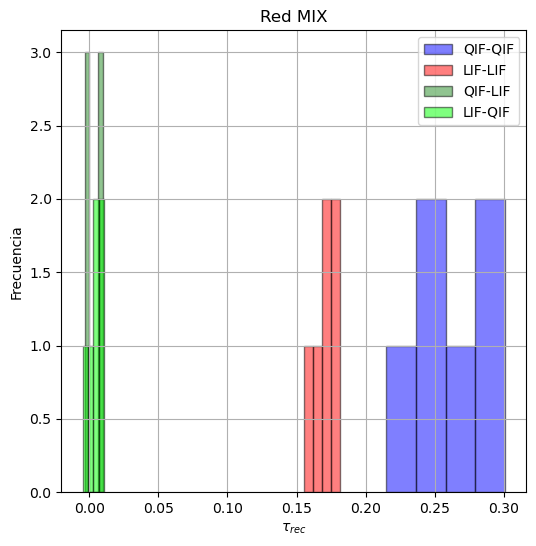

In [ ]:
simulations = [10]
cant_seed = 6
pqif = 0.5

def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)/N
    tau_rec/=sigma2
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn

# Bucle sobre las simulaciones
for num_sim in simulations:
    tau_rec_cuadrante1 = []
    tau_rec_cuadrante2 = []
    tau_rec_cuadrante3 = []
    tau_rec_cuadrante4 = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        # Leer y procesar la matriz de pesos para cada semilla
        matrix = csv_to_matrix(f'/home/martina/prueba/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col]
        cuadrante2 = matrix[:mid_row, mid_col:]
        cuadrante3 = matrix[mid_row:, :mid_col]
        cuadrante4 = matrix[mid_row:, mid_col:]

        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec2, _, _, _ = motifs(cuadrante2, N/2)
        _, tau_rec3, _, _, _ = motifs(cuadrante3, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec_cuadrante1.append(tau_rec1)
        tau_rec_cuadrante2.append(tau_rec2)
        tau_rec_cuadrante3.append(tau_rec3)
        tau_rec_cuadrante4.append(tau_rec4)

    # Convertir las listas a arrays de numpy para facilitar el manejo de los datos
    tau_rec_cuadrante1 = np.array(tau_rec_cuadrante1)
    tau_rec_cuadrante2 = np.array(tau_rec_cuadrante2)
    tau_rec_cuadrante3 = np.array(tau_rec_cuadrante3)
    tau_rec_cuadrante4 = np.array(tau_rec_cuadrante4)

    # Graficar los histogramas de tau_rec para cada cuadrante en los mismos ejes
    plt.figure(figsize=(6, 6))

    plt.hist(tau_rec_cuadrante1, bins=4, color='b', alpha=0.5, edgecolor = 'black', label='QIF-QIF')
    plt.hist(tau_rec_cuadrante4, bins=4, color='r', alpha=0.5, edgecolor = 'black', label='LIF-LIF')
    plt.hist(tau_rec_cuadrante2, bins=4, color='forestgreen', alpha=0.5, edgecolor = 'black', label='QIF-LIF')
    plt.hist(tau_rec_cuadrante3, bins=4, color='lime', alpha=0.5, edgecolor = 'black', label='LIF-QIF')   

  
    plt.xlabel(r'$\tau_{rec}$')
    plt.ylabel('Frecuencia')
    plt.title('Red MIX')
    plt.legend()
    plt.grid(True)
    plt.show()

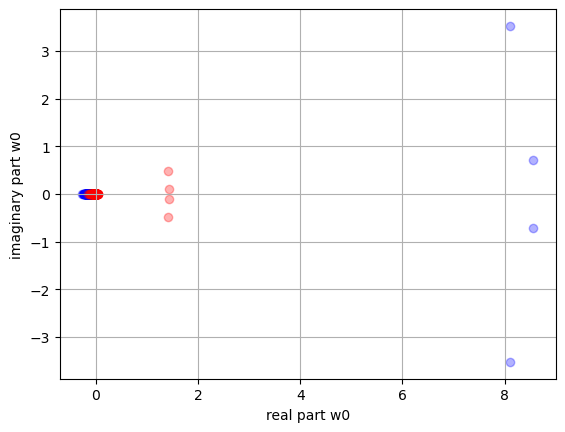

In [ ]:
for k in range(len(pqif_values)):
    pqif = pqif_values[k]

    filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif)}_matriz_iloop_11_semilla_{k}'
    matrix = csv_to_matrix(filename)  # Aquí usas tu función definida en otra celda del notebook        
    eigenval,eigenvec=np.linalg.eig(matrix)
    ar=np.real(eigenval)
    ai=np.imag(eigenval)
    plt.scatter(ar,ai, color = 'b', label = f'pqif = {pqif}', alpha = 0.3)

    filename1 = f'simulacion_{num_sim1}/simulacion_{num_sim1}_matrices_pesos/simulacion_{num_sim1}_pesos_pqif_{first_significant_digit(pqif_value1)}_matriz_iloop_11_semilla_{k}'
    matrix1 = csv_to_matrix(filename1)  # Aquí usas tu función definida en otra celda del notebook        
    eigenval1,eigenvec1=np.linalg.eig(matrix1)
    ar1=np.real(eigenval1)
    ai1=np.imag(eigenval1)
    plt.scatter(ar1,ai1, color = 'r', label = f'pqif = {pqif}', alpha = 0.3)

        
plt.xlabel('real part w0')
plt.ylabel('imaginary part w0')

plt.grid()
        
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'simulacion_9/simulacion_9_matrices_pesos/simulacion_9_pesos_pqif_0.2_matriz_iloop_11_semilla_1'

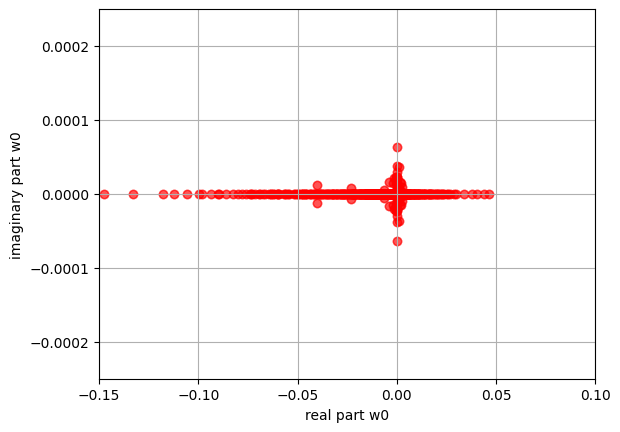

In [ ]:
for k in range(len(pqif_values)):
    pqif = pqif_values[k]


    for j in range(1,6):
        filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{first_significant_digit(pqif)}_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)  # Aquí usas tu función definida en otra celda del notebook        
        eigenval,eigenvec=np.linalg.eig(matrix)
        ar=np.real(eigenval)
        ai=np.imag(eigenval)
        plt.scatter(ar,ai, color = colores[k], label = f'pqif = {pqif}', alpha = 0.2)

           
    plt.xlabel('real part w0')
    plt.ylabel('imaginary part w0')
    plt.xlim(-0.15, 0.1)
    plt.ylim(-0.00025, 0.00025)

    plt.grid()
        
plt.show()